# Topping the Best Sellers: Trends to Watch for in the New York Times Bestsellers
# Written and Coded by: Katrina Jaeger

In this tortorial I'll be looking at data collected from the New York Times Bestsellers list from 2008 to 2018. We'll look at how different subgenres, prices, and combinations of the two fare on the list, and we'll also see if those results change for different time periods.

First thing first though! We have to read in and clean up our data before we can start working on it.

# Section 1: Data Introduction and Reading

I'll be using two different datasets for this anlysis. One was scrapped from the NYT API and the other was scrapped from Goodreads API. You may be asking... if we're looking at the NYTBSL why are we taking data from from Goodreads, a book review site? One of the aspects I want to look at is the subgenres of each book. Is it a fantasy, sci-fi, romance, etc. Unfortunately, NTY does not keep track of that sort of thing, so we'll have to get that data from somewhere else. That's where Goodreads comes to the rescue. 

Goodreads is not a perfect solution though, because they don't keep track of the genres directly. Instead users can tag different books with different tags by sorting them in their virtual libaries. Essencelly, if a lot of users put a book into their fanasty shelve it gets tagged as a fanstasy book. Tag are not restricted to just genres though, they can be settings or reading status ("currently_reading","want_to_buy",etc). Good news is that means that the tag system is more detailed that just fiction/nonfiction or sci-fi/fantasy. Bad news is that means that we could potentally have a lot of subgenre catagories.

CHANGE OF PLANS: MERGE ON UPPER TITLES

Some of that is helped by the fact that we won't be using all the data from both lists. Instead we'll only use the data that is found in both lists. Yes, that means that some data will be lost in the merge, but the data that survives will be more informative. That brings up another problem... how will we match up the data from the two datasets? With a handy little number called the ISBN (International Standard Book Number) which is basically an id number that all of these books have. Both Goodreads and NYT keeps track of those ids so we can use those numbers to match up the entries for the same book.

In [1]:
#pandas helps with readong in the data
import pandas as pd
#first I'll read in the data from the Goodreads dataset.
#From that set I'll be using: Books, Book_Tags, and Tags
books_main = pd.read_csv("books.csv")
#show only the first few enties
books_main.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [2]:
#next up is book_tags
book_tags = pd.read_csv("book_tags.csv")
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [3]:
#next is the tag names
tag_names = pd.read_csv("tags.csv")
print(len(tag_names))

34252


In [4]:
#and now for the NYT data
nyt_best = pd.read_json("nyt2.json",lines=True)
nyt_best.head()

,_id,amazon_product_url,author,bestsellers_date,description,price,published_date,publisher,rank,rank_last_week,title,weeks_on_list
0,{'$oid': '5b4aa4ead3089013507db18b'},http://www.amazon.com/Odd-Hours-Dean-Koontz/dp...,Dean R Koontz,{'$date': {'$numberLong': '1211587200000'}},"Odd Thomas, who can communicate with the dead,...",{'$numberInt': '27'},{'$date': {'$numberLong': '1212883200000'}},Bantam,{'$numberInt': '1'},{'$numberInt': '0'},ODD HOURS,{'$numberInt': '1'}
1,{'$oid': '5b4aa4ead3089013507db18c'},http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,{'$date': {'$numberLong': '1211587200000'}},Aliens have taken control of the minds and bod...,{'$numberDouble': '25.99'},{'$date': {'$numberLong': '1212883200000'}},"Little, Brown",{'$numberInt': '2'},{'$numberInt': '1'},THE HOST,{'$numberInt': '3'}
2,{'$oid': '5b4aa4ead3089013507db18d'},http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,{'$date': {'$numberLong': '1211587200000'}},A woman's happy marriage is shaken when she en...,{'$numberDouble': '24.95'},{'$date': {'$numberLong': '1212883200000'}},St. Martin's,{'$numberInt': '3'},{'$numberInt': '2'},LOVE THE ONE YOU'RE WITH,{'$numberInt': '2'}
3,{'$oid': '5b4aa4ead3089013507db18e'},http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,{'$date': {'$numberLong': '1211587200000'}},A Massachusetts state investigator and his tea...,{'$numberDouble': '22.95'},{'$date': {'$numberLong': '1212883200000'}},Putnam,{'$numberInt': '4'},{'$numberInt': '0'},THE FRONT,{'$numberInt': '1'}
4,{'$oid': '5b4aa4ead3089013507db18f'},http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,{'$date': {'$numberLong': '1211587200000'}},An aging porn queens aims to cap her career by...,{'$numberDouble': '24.95'},{'$date': {'$numberLong': '1212883200000'}},Doubleday,{'$numberInt': '5'},{'$numberInt': '0'},SNUFF,{'$numberInt': '1'}


In [5]:
nyt_prest = pd.DataFrame({'author':nyt_best['author'],'price':nyt_best['price'],'rank':nyt_best['rank'],'title':nyt_best['title']})
print(len(nyt_prest))

10195


# Section 2: Cleaning Up Our Data

In [6]:
books_main_prest = pd.DataFrame({'book_id':books_main['book_id'],'authors':books_main['authors'],'original_title':books_main['original_title']})
books_main_prest.head()

,book_id,authors,original_title
0,2767052,Suzanne Collins,The Hunger Games
1,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone
2,41865,Stephenie Meyer,Twilight
3,2657,Harper Lee,To Kill a Mockingbird
4,4671,F. Scott Fitzgerald,The Great Gatsby


So now we have our data. ...but it's really messy and hard to read at some places. Not to mention it has a lot of extra data that won't be used. Also, as I mentioned before we'll only use data that is in both datasets.

In [7]:
#since the nyt dataset is ugly right now let's fix it
nyt_books = pd.DataFrame(nyt_best)
from datetime import datetime
def get_num(x):
    #for prices that are XX.99 I'll round them up
    if '$numberDouble' in x:
        ret_num = int(float(x['$numberDouble'])+0.01)
    elif '$date' in x:
        #divide the timestamp from the dataset since it's in miliseconds when datetime wants seconds
        ret_num = datetime.fromtimestamp(int(x['$date']['$numberLong'])/1000)
    else:
        ret_num = int(x['$numberInt'])
    return ret_num
nyt_books['rank'] = nyt_books['rank'].apply(get_num)
nyt_books['price'] = nyt_books['price'].apply(get_num)
nyt_books['weeks_on_list'] = nyt_books['weeks_on_list'].apply(get_num)
nyt_books['bestsellers_date'] = nyt_books['bestsellers_date'].apply(get_num)
nyt_books.head()

,_id,amazon_product_url,author,bestsellers_date,description,price,published_date,publisher,rank,rank_last_week,title,weeks_on_list
0,{'$oid': '5b4aa4ead3089013507db18b'},http://www.amazon.com/Odd-Hours-Dean-Koontz/dp...,Dean R Koontz,2008-05-23 20:00:00,"Odd Thomas, who can communicate with the dead,...",27,{'$date': {'$numberLong': '1212883200000'}},Bantam,1,{'$numberInt': '0'},ODD HOURS,1
1,{'$oid': '5b4aa4ead3089013507db18c'},http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,2008-05-23 20:00:00,Aliens have taken control of the minds and bod...,26,{'$date': {'$numberLong': '1212883200000'}},"Little, Brown",2,{'$numberInt': '1'},THE HOST,3
2,{'$oid': '5b4aa4ead3089013507db18d'},http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,2008-05-23 20:00:00,A woman's happy marriage is shaken when she en...,24,{'$date': {'$numberLong': '1212883200000'}},St. Martin's,3,{'$numberInt': '2'},LOVE THE ONE YOU'RE WITH,2
3,{'$oid': '5b4aa4ead3089013507db18e'},http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,2008-05-23 20:00:00,A Massachusetts state investigator and his tea...,22,{'$date': {'$numberLong': '1212883200000'}},Putnam,4,{'$numberInt': '0'},THE FRONT,1
4,{'$oid': '5b4aa4ead3089013507db18f'},http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,2008-05-23 20:00:00,An aging porn queens aims to cap her career by...,24,{'$date': {'$numberLong': '1212883200000'}},Doubleday,5,{'$numberInt': '0'},SNUFF,1


In [8]:
#Beautiful! Now let's combine each book's data into one entry per book/author combination!
author_list = list()
best_start_list = list()
best_end_list = list()
desc_list = list()
avg_price_list = list()
score_list = list()
weeks_list = list()
title_list = list()
#go through the books by title
for title_group in nyt_books.groupby("title"):
    #print(title_group[1]['title'])
    #some authors have books with the same name so go through those authors
    for author_group in title_group[1].groupby('author'):
        #save the data that stays the same
        author_list.append(author_group[1]['author'].unique()[0])
        desc_list.append(author_group[1]['description'].unique()[0])
        title_list.append(author_group[1]['title'].unique()[0])
        #take the smallest date as the bestsellers start...
        best_start_list.append(min(author_group[1]['bestsellers_date']))
        #...and the max as the end
        best_end_list.append(max(author_group[1]['bestsellers_date']))
        #take the max val of weeks on list as the total weeks on the list
        #+1 to could the week that the max is from (ex: a book that was on the list would have a weeks on of 0)
        weeks_list.append(max(author_group[1]['weeks_on_list'])+1)
        #take the average price 
        avg_price_list.append(sum(author_group[1]['price'])/len(author_group[1]['price']))
        #now go through all of the entries and give them points based on their rank
        #the point are 21-x so that a book at rank 1 gets 20 points, and one at 20 gets 1 point.
        book_score = 0
        for book_entry in author_group[1].iterrows():
            book_score = book_score + (21-book_entry[1]['rank'])
        score_list.append(book_score)
        book_score = 0
#now that er have our combined values let's put them in a dataframe
best_book = pd.DataFrame({'Title':title_list,'Author':author_list, 'Bestseller_Score':score_list,'Average_Price':avg_price_list,'Weeks_on_List':weeks_list,'Bestseller_Start':best_start_list,'Bestseller_End':best_end_list, 'Description':desc_list})
print(len(best_book['Author']))
best_book.head()

2328


,Title,Author,Bestseller_Score,Average_Price,Weeks_on_List,Bestseller_Start,Bestseller_End,Description
0,10TH ANNIVERSARY,James Patterson and Maxine Paetro,131,22.400000,9,2011-05-06 20:00:00,2011-07-08 20:00:00,Detective Lindsay Boxer and the Womenâ€™s Murd...
1,11/22/63,Stephen King,321,31.956522,22,2011-11-11 19:00:00,2012-04-27 20:00:00,An English teacher travels back to 1958 by way...
2,11TH HOUR,James Patterson and Maxine Paetro,123,22.400000,9,2012-05-11 20:00:00,2012-07-13 20:00:00,Detective Lindsay Boxer and the Womenâ€™s Murd...
3,1225 CHRISTMAS TREE LANE,Debbie Macomber,58,9.142857,5,2011-09-30 20:00:00,2011-11-11 19:00:00,Puppies and an ex-husband loom large in the la...
4,12TH OF NEVER,James Patterson and Maxine Paetro,94,0.000000,7,2013-05-03 20:00:00,2013-06-14 20:00:00,"One week after the birth of her baby, Detectiv..."


In [9]:
books_main['test_title']=books_main['original_title'].str.upper()
books_main['test_title'].head()

0                            THE HUNGER GAMES
1    HARRY POTTER AND THE PHILOSOPHER'S STONE
2                                    TWILIGHT
3                       TO KILL A MOCKINGBIRD
4                            THE GREAT GATSBY
Name: test_title, dtype: object

In [10]:
title_match = best_book.merge(books_main,how="inner",left_on="Title",right_on="test_title")
print(len(title_match['Author']))
title_match

881


,Title,Author,Bestseller_Score,Average_Price,Weeks_on_List,Bestseller_Start,Bestseller_End,Description,id,book_id,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,test_title
0,10TH ANNIVERSARY,James Patterson and Maxine Paetro,131,22.400000,9,2011-05-06 20:00:00,2011-07-08 20:00:00,Detective Lindsay Boxer and the Womenâ€™s Murd...,3801,9436746,...,32557,1691,253,1140,6909,12600,11655,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,10TH ANNIVERSARY
1,11/22/63,Stephen King,321,31.956522,22,2011-11-11 19:00:00,2012-04-27 20:00:00,An English teacher travels back to 1958 by way...,295,10644930,...,303057,30656,2927,7649,35500,109392,147589,https://images.gr-assets.com/books/1327876792m...,https://images.gr-assets.com/books/1327876792s...,11/22/63
2,11TH HOUR,James Patterson and Maxine Paetro,123,22.400000,9,2012-05-11 20:00:00,2012-07-13 20:00:00,Detective Lindsay Boxer and the Womenâ€™s Murd...,4048,11872242,...,29552,1792,163,979,6872,11771,9767,https://images.gr-assets.com/books/1328409443m...,https://images.gr-assets.com/books/1328409443s...,11TH HOUR
3,12TH OF NEVER,James Patterson and Maxine Paetro,94,0.000000,7,2013-05-03 20:00:00,2013-06-14 20:00:00,"One week after the birth of her baby, Detectiv...",4377,15734464,...,26821,1941,225,1156,6212,10408,8820,https://images.gr-assets.com/books/1353436409m...,https://images.gr-assets.com/books/1353436409s...,12TH OF NEVER
4,14TH DEADLY SIN,James Patterson and Maxine Paetro,98,0.000000,8,2015-05-08 20:00:00,2015-06-26 20:00:00,"A video of a shocking crime surfaces, casting ...",5164,23346918,...,21946,1709,279,864,4923,8610,7270,https://images.gr-assets.com/books/1425682789m...,https://images.gr-assets.com/books/1425682789s...,14TH DEADLY SIN
5,15TH AFFAIR,James Patterson and Maxine Paetro,114,0.000000,8,2016-05-06 20:00:00,2016-06-24 20:00:00,When a brutal murder threatens the domestic ha...,6694,25613617,...,17768,1502,166,717,3535,7124,6226,https://images.gr-assets.com/books/1444918177m...,https://images.gr-assets.com/books/1444918177s...,15TH AFFAIR
6,206 BONES,Kathy Reichs,48,27.000000,5,2009-08-28 20:00:00,2009-09-18 20:00:00,Temperance Brennan is accused of mishandling a...,7065,5957702,...,19519,1126,177,810,5006,7889,5637,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,206 BONES
7,2312,Kim Stanley Robinson,1,0.000000,1,2012-05-25 20:00:00,2012-05-25 20:00:00,,8169,11830394,...,12097,1828,675,1648,3688,3975,2111,https://images.gr-assets.com/books/1405778758m...,https://images.gr-assets.com/books/1405778758s...,2312
8,61 HOURS,Lee Child,84,24.000000,7,2010-05-22 20:00:00,2010-07-10 20:00:00,Jack Reacher helps the police in a small South...,2121,6977769,...,51841,3235,325,1459,9797,22380,17880,https://images.gr-assets.com/books/1320512665m...,https://images.gr-assets.com/books/1320512665s...,61 HOURS
9,77 SHADOW STREET,Dean Koontz,49,21.000000,4,2011-12-30 19:00:00,2012-01-20 19:00:00,A 19th-century tycoonâ€™s mansion has been tur...,6779,11166890,...,16528,1984,1517,2687,4860,4340,3124,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,77 SHADOW STREET


In [11]:
title_match = title_match.drop(columns=["ratings_1","ratings_2","ratings_3","ratings_4","ratings_5","image_url","small_image_url","work_text_reviews_count","average_rating","ratings_count","work_ratings_count","original_publication_year"])
title_match.head()

,Title,Author,Bestseller_Score,Average_Price,Weeks_on_List,Bestseller_Start,Bestseller_End,Description,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_title,title,language_code,test_title
0,10TH ANNIVERSARY,James Patterson and Maxine Paetro,131,22.400000,9,2011-05-06 20:00:00,2011-07-08 20:00:00,Detective Lindsay Boxer and the Womenâ€™s Murd...,3801,9436746,9436746,14321334,45,316036269,9.780316e+12,"James Patterson, Maxine Paetro",10th Anniversary,"10th Anniversary (Women's Murder Club, #10)",eng,10TH ANNIVERSARY
1,11/22/63,Stephen King,321,31.956522,22,2011-11-11 19:00:00,2012-04-27 20:00:00,An English teacher travels back to 1958 by way...,295,10644930,10644930,15553789,145,1451627289,9.781452e+12,Stephen King,11/22/63,11/22/63,eng,11/22/63
2,11TH HOUR,James Patterson and Maxine Paetro,123,22.400000,9,2012-05-11 20:00:00,2012-07-13 20:00:00,Detective Lindsay Boxer and the Womenâ€™s Murd...,4048,11872242,11872242,16829865,47,1846057914,9.781846e+12,"James Patterson, Maxine Paetro",11th hour,"11th Hour (Women's Murder Club, #11)",eng,11TH HOUR
3,12TH OF NEVER,James Patterson and Maxine Paetro,94,0.000000,7,2013-05-03 20:00:00,2013-06-14 20:00:00,"One week after the birth of her baby, Detectiv...",4377,15734464,15734464,21416605,41,NaN,NaN,"James Patterson, Maxine Paetro",12th of Never,"12th of Never (Women's Murder Club, #12)",en-US,12TH OF NEVER
4,14TH DEADLY SIN,James Patterson and Maxine Paetro,98,0.000000,8,2015-05-08 20:00:00,2015-06-26 20:00:00,"A video of a shocking crime surfaces, casting ...",5164,23346918,23346918,42742312,42,1780892888,9.781781e+12,"James Patterson, Maxine Paetro",14th Deadly Sin,"14th Deadly Sin (Women’s Murder Club, #14)",eng,14TH DEADLY SIN


In [12]:
test_list = list()
nyt_pair = False
gr_pair = False
gr_inital = False
check = False
sweater = False
for test_row in title_match.iterrows():
    if test_row[1]['Author'] == test_row[1]['authors']:
        test_list.append(True)
    else:
        #if test_row[1]['test_title'] == "A KNIGHT OF THE SEVEN KINGDOMS":
            #check = True
        #save this row's authors as strings
        nyt_author = test_row[1]['Author'].upper()
        gr_author = test_row[1]['authors'].upper()
        #replacev separators with ' ' (and check of there are two authors)
        if "AND" in nyt_author:
            nyt_author = nyt_author.replace(" AND "," ")
            nyt_pair = True
        if "WITH" in nyt_author:
            #the Christmas Sweater is the only case with both and and with and it matches so just say it's good
            if nyt_pair == True:
                test_list.append(True)
                sweater = True
            nyt_author = nyt_author.replace(" WITH "," ")
            nyt_pair = True
        if not sweater:
            if "," in gr_author:
                gr_author = gr_author.replace(", "," ")
                gr_pair = True
            if "." in gr_author:
                gr_author = gr_author.replace("."," ")
                gr_intial = True
            nyt_words = nyt_author.split()
            gr_words = gr_author.split()
            #saving lengths since I'll use them a few times
            nyt_len = len(nyt_words)
            gr_len = len(gr_words)
            #if they both have two names then compare the two names
            if nyt_pair == True and gr_pair == True:
                if nyt_len == gr_len:
                    #if the author names have the same number of words compare the whole list
                    if nyt_words == gr_words:
                        test_list.append(True)
                    else:
                        #before tossing it out check if they're the same but reverse
                        if nyt_len % 2 == 0:
                            nyt_mid = int((nyt_len/2)-1)
                        else:
                            nyt_mid = int((nyt_len/2)-0.5)
            
                        if gr_len % 2 == 0:
                            gr_mid = int((gr_len/2)-1)
                        else:
                            gr_mid = int((gr_len/2)-0.5)
                        
                        if (((gr_words[0]==nyt_words[nyt_mid+1]) and (gr_words[gr_mid]==nyt_words[nyt_len-1])) 
                        and ((gr_words[gr_mid+1]==nyt_words[0]) and (gr_words[gr_len-1]==nyt_words[nyt_mid]))):
                            test_list.append(True)
                        else:
                            test_list.append(False)
                #if they don't then compare the authors to see if they're the same (or in reverse order)
                else:
                    if nyt_len % 2 == 0:
                        nyt_mid = int((nyt_len/2)-1)
                    else:
                        nyt_mid = int((nyt_len/2)-0.5)
            
                    if gr_len % 2 == 0:
                        gr_mid = int((gr_len/2)-1)
                    else:
                        gr_mid = int((gr_len/2)-0.5)
                    #checks if (nyt_A = gr_A and nyt_B = gr_B) or (nyt_A = gr_B and nyt_B = gr_A) 
                    if ((((gr_words[0]==nyt_words[0]) and (gr_words[gr_mid]==nyt_words[nyt_mid]))
                    and ((gr_words[gr_mid+1]==nyt_words[nyt_mid+1]) and (gr_words[gr_len-1]==nyt_words[nyt_len-1])))
                    or (((gr_words[0]==nyt_words[nyt_mid+1]) and (gr_words[gr_mid]==nyt_words[nyt_len-1])) 
                    and ((gr_words[gr_mid+1]==nyt_words[0]) and (gr_words[gr_len-1]==nyt_words[nyt_mid])))):
                        test_list.append(True)
                    else:
                        test_list.append(False)
            #if only the nyt has a pair (and gr only has one author) compare gr's author to the 2 nyt authors
            elif nyt_pair == True:
                if nyt_len % 2 == 0:
                    nyt_mid = int((nyt_len/2)-1)
                else:
                    nyt_mid = int((nyt_len/2)-0.5)
        
                if (((gr_words[0]==nyt_words[0]) and (gr_words[gr_len-1]==nyt_words[nyt_mid]))
                or ((gr_words[0]==nyt_words[nyt_mid+1]) and (gr_words[gr_len-1]==nyt_words[nyt_len-1]))):
                    test_list.append(True)
                else:
                    test_list.append(False)
            #vice versa for gr
            elif gr_pair == True:
                #George R R Martin breaks the rules in one case so just say that case is good
                #There is also a weird case with 3 gr authors so do the same with that
                if ((nyt_len == 4 and nyt_words[0]=="GEORGE" and nyt_words[3]=="MARTIN" and gr_len == 6 and gr_words[4] == "GARY")
                or (gr_len == 6 and nyt_words[0]=="VINCE" and nyt_words[1]=="FLYNN")) :
                    test_list.append(True)
                else:
                    if gr_len % 2 == 0:
                        gr_mid = int((gr_len/2)-1)
                    else:
                        gr_mid = int((gr_len/2)-0.5)
                    if check:
                        print(gr_words[gr_mid])
        
                    if (((nyt_words[0]==gr_words[0]) and (nyt_words[nyt_len-1]==gr_words[gr_mid] or nyt_words[nyt_len-1]==gr_words[gr_mid-1])) 
                    or ((nyt_words[0]==gr_words[gr_mid+1]) and (nyt_words[nyt_len-1]==gr_words[gr_len-1]))):
                        test_list.append(True)
                    else:
                        test_list.append(False)
        
            else:
                #if the author names have the same number of words compare the whole list
                if nyt_len == gr_len:
                    if nyt_words == gr_words:
                        test_list.append(True)
                    else:
                        test_list.append(False)
                 #if they're different lengths compare the first and last names (use len to skip middle inital)
                else:
                    if (nyt_words[0]==gr_words[0]) and (nyt_words[nyt_len-1]==gr_words[gr_len-1]):
                        test_list.append(True)
                    else:
                        test_list.append(False)
    nyt_pair= False
    gr_pair = False
    sweater = False

In [13]:
#now that we have the authors all matched up let's drop the authors that don't match!
title_match["author_match"]=test_list
author_match_df = title_match[title_match["author_match"]==True]
len(author_match_df['Author'])

764

so now we're down to 764 entries BUT we're not done yet! Each book has an entry for each week that they were on the NYTBS while this data might come in handy later (so I'll keep it around) since I'm more interested in overall treads right now, we can combine them down into one entry per book. 

In [14]:
#since our authors now match we can drop one of those columns and some of the other columns
author_match_df = author_match_df.drop(columns=["authors","test_title","title","original_title","best_book_id","work_id","id","author_match","isbn13","language_code","isbn","books_count"])
author_match_df = author_match_df.rename(columns={"book_id":"goodread_book_id"})
author_match_df.head()

,Title,Author,Bestseller_Score,Average_Price,Weeks_on_List,Bestseller_Start,Bestseller_End,Description,goodread_book_id
0,10TH ANNIVERSARY,James Patterson and Maxine Paetro,131,22.400000,9,2011-05-06 20:00:00,2011-07-08 20:00:00,Detective Lindsay Boxer and the Womenâ€™s Murd...,9436746
1,11/22/63,Stephen King,321,31.956522,22,2011-11-11 19:00:00,2012-04-27 20:00:00,An English teacher travels back to 1958 by way...,10644930
2,11TH HOUR,James Patterson and Maxine Paetro,123,22.400000,9,2012-05-11 20:00:00,2012-07-13 20:00:00,Detective Lindsay Boxer and the Womenâ€™s Murd...,11872242
3,12TH OF NEVER,James Patterson and Maxine Paetro,94,0.000000,7,2013-05-03 20:00:00,2013-06-14 20:00:00,"One week after the birth of her baby, Detectiv...",15734464
4,14TH DEADLY SIN,James Patterson and Maxine Paetro,98,0.000000,8,2015-05-08 20:00:00,2015-06-26 20:00:00,"A video of a shocking crime surfaces, casting ...",23346918


In [15]:
author_match_df.sort_values('Bestseller_Score',ascending=False)

,Title,Author,Bestseller_Score,Average_Price,Weeks_on_List,Bestseller_Start,Bestseller_End,Description,goodread_book_id
654,THE HELP,Kathryn Stockett,1582,22.736842,109,2009-03-13 20:00:00,2011-09-09 20:00:00,A young white woman and two black maids collab...,4667024
639,THE GIRL ON THE TRAIN,Paula Hawkins,1313,0.000000,80,2015-01-16 19:00:00,2016-07-22 20:00:00,A psychological thriller set in London is full...,22557272
253,GONE GIRL,Gillian Flynn,1243,13.218391,81,2012-06-08 20:00:00,2014-04-18 20:00:00,A woman disappears on the day of her fifth ann...,8442457
723,THE NIGHTINGALE,Kristin Hannah,981,0.000000,83,2015-02-06 19:00:00,2016-12-16 19:00:00,Two sisters in World War II France: one strugg...,21853621
10,A DANCE WITH DRAGONS,George R R Martin,956,22.783019,87,2011-07-15 20:00:00,2013-09-06 20:00:00,"After a colossal battle, the Seven Kingdoms fa...",10664113
646,THE GOLDFINCH,Donna Tartt,917,0.000000,61,2013-10-25 20:00:00,2015-02-06 19:00:00,Â A painting smuggled out of the Metropolitan ...,17333223
656,THE HOST,Stephenie Meyer,877,21.794118,60,2008-05-23 20:00:00,2009-09-18 20:00:00,Aliens have taken control of the minds and bod...,1656001
777,THE STORY OF EDGAR SAWTELLE,David Wroblewski,584,24.375000,40,2008-06-13 20:00:00,2009-03-20 20:00:00,A young mute who can communicate with dogs his...,2731276
14,A GENTLEMAN IN MOSCOW,Amor Towles,567,0.000000,59,2016-09-09 20:00:00,2018-04-27 20:00:00,A Russian count undergoes 30 years of house ar...,29430012
794,THE UNDERGROUND RAILROAD,Colson Whitehead,505,0.000000,38,2016-08-05 20:00:00,2017-05-05 20:00:00,A slave girl heads toward freedom on the netwo...,30555488


In [16]:
tag_merge_df = pd.DataFrame({'GoodRead_ID':author_match_df['goodread_book_id'],'Title':author_match_df['Title'],'Author':author_match_df['Author']})
best_seller_tags = tag_merge_df.merge(book_tags,how="inner",left_on="GoodRead_ID",right_on="goodreads_book_id")
#we can drop the extra id column
best_seller_tags = best_seller_tags.drop(columns=["goodreads_book_id"])
#now let's bring in the tag names
best_seller_tags = best_seller_tags.merge(tag_names,how="inner",left_on="tag_id",right_on="tag_id")
#since there are a LOT of tags that aren't genres I'm going to go through all of the entries and catagorize them.
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("read")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("book")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("series")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("own")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("kindle")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("library")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("finish")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("alex")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("1001")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("audio")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("default")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("buy")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("audible")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("reacher")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("sigma")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("stephanie")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("gave")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("general")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("short")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("animal")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("inspirational")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("retelling")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("preston")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("southern")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("bennett")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("clancy")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("food")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("pulitzer")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("recommend")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("canad")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("2017")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("2016")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("2018")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("author")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("interest")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("rowling")==False)]

#drop "favorites" + variations
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("favorite")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("favourite")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="Ｆａｖｏｒｉｔｅｓ")]
#drop "fiction" (we're in a fiction list)
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="fiction")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="dfw")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="dnf")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="novel")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="novels")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="non-fiction")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="abandoned")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="contemporary")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="contemporary-fiction")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="literary-fiction")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="literary")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="literature")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="patterson")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="wish-list")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="palahniuk")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="borrowed")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="adult-fiction")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="adult")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="have")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="nope")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="bonobos")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="dogs")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="oprah")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="picoult")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="dekker")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="christian-fiction")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="stories")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="grisham")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="netgalley")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="ya")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="young-adult")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="jack-ryan")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="other")]

#make a temp column to test if the tag is the author's name 
#(using first name to catch cases like "stephen-king")
def contains_first_name(x):
    author_name = x['Author'].lower().split()[0]
    if author_name in x['tag_name']:
        return True
    else: 
        return False
best_seller_tags['author_first_name'] = best_seller_tags.apply(contains_first_name, axis=1)
best_seller_tags = best_seller_tags[(best_seller_tags['author_first_name']==False)]
best_seller_tags = best_seller_tags.drop(columns="author_first_name")
print(len(best_seller_tags['tag_name']))
best_seller_tags.head()

28805


,GoodRead_ID,Title,Author,tag_id,count,tag_name
1540,9436746,10TH ANNIVERSARY,James Patterson and Maxine Paetro,20939,424,mystery
1541,10644930,11/22/63,Stephen King,20939,375,mystery
1542,11872242,11TH HOUR,James Patterson and Maxine Paetro,20939,371,mystery
1543,15734464,12TH OF NEVER,James Patterson and Maxine Paetro,20939,298,mystery
1544,23346918,14TH DEADLY SIN,James Patterson and Maxine Paetro,20939,215,mystery


In [17]:
#now let's work on the tag info. Since there are a lot of tags, I'll merge the list with a shorter verson of the dataframe above
best_seller_tags.sort_values('count',ascending=False).head()
best_seller_tags[(best_seller_tags['tag_name'].str.contains("other")==True)].sort_values('count',ascending=False)['tag_name'].unique()

array(['black-dagger-brotherhood', 'women-of-the-otherworld',
       'otherworld', 'the-others', 'brothers', 'mothers-and-daughters',
       'the-black-dagger-brotherhood', 'brotherhood', 'motherhood',
       'mothers', 'mother-daughter', 'mother-daughter-relationship',
       'generational-mothers-daughters-rela', 'brothers-and-sisters',
       'mothers-daughters', 'mother-daughter-relationships',
       'other-fiction'], dtype=object)

In [18]:
best_seller_tags[best_seller_tags['count']>1000]['tag_name'].unique()

array(['mystery', 'suspense', 'crime', 'thriller', 'mystery-thriller',
       'romance', 'historical-fiction', 'science-fiction', 'time-travel',
       'sci-fi', 'fantasy', 'horror', 'historical', 'adventure',
       'paranormal', 'chick-lit', 'dystopian', 'dystopia', 'magic',
       'vampires', 'witches', 'urban-fantasy', 'paranormal-romance',
       'magical-realism', 'humor', 'mythology', 'aliens'], dtype=object)

In [19]:
#now to orginize the books into genres, I'll give them points towards each genre using the counts of the tags.
#The genres I will be using are: Mystery, Thriller, Realistic, Romance, Fantasy, Science Fiction, & Other
#I'm spliting the genres into two types (just to orginize them)
#setting/plot: Scifi, Fantasy, Realistic
#mood/tone/plot: Thiller, Mystery, Romance, Comedy, Drama
#For subgenres (like paranormal) I'll count them towards their main genre. 
#For dual genre tags (like mystery-romance) I'll give those points to both main genres
#whichever genre has the most points for each book will be that books primary genre, and 2nd place will be it's secondary

gr_id_tag_list = list()
author_tag_list = list()
title_tag_list = list()
mystery_list = list()
thiller_list = list()
history_list = list()
romance_list = list()
scifi_list = list()
fantasy_list = list()
other_list = list()
comedy_list = list()
drama_list = list()
primary_list = list()
second_list = list()
#sort the df by count
best_seller_tags = best_seller_tags.sort_values('count',ascending=False)
for curr_title in best_seller_tags.groupby('GoodRead_ID'):
    #save the id
    gr_id_tag_list.append(curr_title[0])
    #save the author
    author_tag_list.append(curr_title[1]['Author'].unique()[0])
    #save the title
    title_tag_list.append(curr_title[1]['Title'].unique()[0])
    #take the first 5 tags (which will be the tags with the highest counts)
    tag_head = curr_title[1].head()
    mys_score = 0
    thill_score = 0
    hist_score = 0
    rom_score = 0
    scifi_score = 0
    fan_score = 0
    com_score = 0
    drama_score = 0
    other_score = 0
    for curr_row in tag_head.iterrows():
        curr_tag = curr_row[1]['tag_name']
        curr_count = curr_row[1]['count']
        counted = False
        if "myster" in curr_tag or "crime" in curr_tag or "espionage" in curr_tag or "spy" in curr_tag or "detective" in curr_tag or "murder" in curr_tag:
            mys_score = mys_score + curr_count
            counted = True
        if curr_tag == "scifi" or "science" in curr_tag or curr_tag == "science-fiction" or "sf" == curr_tag or "sci-fi" in curr_tag or "dystopia" in curr_tag or "post-apocalyptic" in curr_tag:
            scifi_score = scifi_score + curr_count
            counted = True
        if "romance" in curr_tag or ("chic" in curr_tag and "lit" in curr_tag) or "love" in curr_tag or "marriage" in curr_tag or curr_tag == "relationships":
            rom_score = rom_score + curr_count
            counted = True
        if "thriller" in curr_tag or "suspense" in curr_tag or "horror" in curr_tag or "action" in curr_tag:
            thill_score = thill_score + curr_count
            counted = True
        if "fantasy" in curr_tag or "paranormal" in curr_tag or "witchcraft" in curr_tag or "vampire" in curr_tag or "magic" in curr_tag or "werewolves" in curr_tag or "spiritual" in curr_tag:
            fan_score = fan_score + curr_count
            counted = True
        if "histor" in curr_tag or "war" in curr_tag or "9-11" in curr_tag or "usa" in curr_tag or "europe" in curr_tag or "modern" in curr_tag or "holocaust" in curr_tag or "california" in curr_tag or "news" in curr_tag or "hollywood" in curr_tag or "family" in curr_tag or "salem-witch-trials" in curr_tag or "journalism" in curr_tag or "foster" in curr_tag or "shakespeare" in curr_tag or "travel" in curr_tag or "queer" in curr_tag or "lgbt" in curr_tag or "biograph" in curr_tag or "christmas" in curr_tag or "africa" in curr_tag or "usa" in curr_tag  or "new-york" in curr_tag or "nyc" in curr_tag or "american" in curr_tag or "british" in curr_tag or "london" in curr_tag or "wwii" in curr_tag or "adoption" in curr_tag or "england" in curr_tag or "coming-of-age" in curr_tag or "india" in curr_tag or "realistic-fiction" in curr_tag or "sport" in curr_tag:
            hist_score = hist_score + curr_count
            counted = True
        if "comedy" in curr_tag or "funny" in curr_tag or "humo" in curr_tag:
            com_score = com_score + curr_count
            counted = True
        if "drama" in curr_tag or "grief" in curr_tag or "death" in curr_tag: 
            drama_score = drama_score + curr_count
            counted = True
        if counted == False:
            other_score = other_score + curr_count
    mystery_list.append(mys_score)
    thiller_list.append(thill_score)
    history_list.append(hist_score)
    romance_list.append(rom_score)
    scifi_list.append(scifi_score)
    fantasy_list.append(fan_score)
    comedy_list.append(com_score)
    drama_list.append(drama_score)
    other_list.append(other_score)
    #figure out which score is highest
    prime = ""
    sec = ""
    prime_score = 0
    sce_score = 0
    #scifi vs fantasy
    if scifi_score > fan_score:
        prime = "SciFi"
        sec = "Fantasy"
        prime_score = scifi_score
        sec_score = fan_score
    elif scifi_score == fan_score:
        prime = "Fantasy/SciFi"
        prime_score = fan_score
    else:
        prime = "Fantasy"
        sec = "SciFi"
        prime_score = fan_score
        sec_score = scifi_score
        
    #prime vs mystery
    if mys_score > prime_score:
        temp = prime
        prime = "Mystery"
        sec = temp
        temp_score = prime_score
        prime_score = mys_score
        sec_score = temp_score
    elif mys_score == prime_score:
        prime = prime + "/Mystery"
    else:
        #Mystery vs second
        if mys_score > sec_score:
            sec = "Mystery"
            sec_score = mys_score
        elif mys_score == sec_score:
            sec = sec + "/Mystery"
     #prime vs romance
    if rom_score > prime_score:
        temp = prime
        prime = "Romance"
        sec = temp
        temp_score = prime_score
        prime_score = rom_score
        sec_score = temp_score
    elif rom_score == prime_score:
        prime = prime + "/Romance"
    else:
        #romance vs second
        if rom_score > sec_score:
            sec = "Romance"
            sec_score = rom_score
        elif rom_score == sec_score:
            sec = sec + "/Romance"
    #History vs prime 
    if hist_score > prime_score:
        temp = prime
        prime = "Realistic"
        sec = temp
        temp_score = prime_score
        prime_score = hist_score
        sec_score = temp_score
    elif hist_score == prime_score:
        prime = prime + "/Realistic"
    else:
        #hist vs second
        if hist_score > sec_score:
            sec = "Realistic"
            sec_score = hist_score
        elif hist_score == sec_score:
            sec = sec + "/Realistic"
    #Thiller vs prime
    if thill_score > prime_score:
        temp = prime
        prime = "Thriller"
        sec = temp
        temp_score = prime_score
        prime_score = thill_score
        sec_score = temp_score
    elif thill_score == prime_score:
        prime = prime + "/Thriller"
    else:
        #thill vs second
        if thill_score > sec_score:
            sec = "Thriller"
            sec_score = thill_score
        elif thill_score == sec_score:
            sec = sec + "/Thriller"
    #comedy vs prime
    if com_score > prime_score:
        temp = prime
        prime = "Comedy"
        sec = temp
        temp_score = prime_score
        prime_score = com_score
        sec_score = temp_score
    elif com_score == prime_score:
        prime = prime + "/Comedy"
    else:
        #comedy vs second
        if com_score > sec_score:
            sec = "Comedy"
            sec_score = com_score
        elif com_score == sec_score:
            sec = sec + "/Comedy"
    #Drama vs prime
    if drama_score > prime_score:
        temp = prime
        prime = "Drama"
        sec = temp
        temp_score = prime_score
        prime_score = drama_score
        sec_score = temp_score
    elif drama_score == prime_score:
        prime = prime + "/Drama"
    else:
        #drama vs second
        if drama_score > sec_score:
            sec = "Drama"
            sec_score = drama_score
        elif drama_score == sec_score:
            sec = sec + "/Drama"
    #Other vs prime
    if other_score > prime_score:
        temp = prime
        prime = "Other"
        sec = temp
        temp_score = prime_score
        prime_score = other_score
        sec_score = temp_score
    #elif other_score == prime_score:
        #prime = prime + "/Other"
    else:
        #other vs second
        if other_score > sec_score:
            sec = "Other"
            sec_score = other_score
        #elif other_score == sec_score:
            #sec = sec + "/Other"
    #swap genre if other is prime
    if prime == "Other":
        temp = prime
        prime = sec
        sec = temp
    if sec_score == 0:
        sec = "None"
    primary_list.append(prime)
    second_list.append(sec)
genre_seller = pd.DataFrame({'GoodReads_ID':gr_id_tag_list,'Author':author_tag_list,'Title':title_tag_list,'Primary_Genre':primary_list,'Secondary_Genre':second_list,'Fantasy_Score':fantasy_list,'SciFi_Score':scifi_list,'Mystery_Score':mystery_list,'Romance_Score':romance_list,'Comedy_Score':comedy_list,'Drama_Score':drama_list,'Historical_Score':history_list,'Thriller_Score':thiller_list,'Other_Score':other_list})
genre_seller.head()

,GoodReads_ID,Author,Title,Primary_Genre,Secondary_Genre,Fantasy_Score,SciFi_Score,Mystery_Score,Romance_Score,Comedy_Score,Drama_Score,Historical_Score,Thriller_Score,Other_Score
0,28866,Christine Feehan,DARK PRINCE,Fantasy,Romance,2545,0,0,1621,0,0,0,0,0
1,85301,Jhumpa Lahiri,UNACCUSTOMED EARTH,Realistic,Other,0,0,0,0,0,0,440,0,94
2,93796,Daniel Silva,THE SECRET SERVANT,Mystery,Thriller,0,0,232,0,0,0,0,169,59
3,98250,John L Parker Jr,ONCE A RUNNER,Realistic,Other,0,0,0,0,0,0,135,0,363
4,128029,Khaled Hosseini,A THOUSAND SPLENDID SUNS,Realistic,Other,0,0,0,0,0,384,3163,0,1412


In [20]:
#maybe add a case if all other scores are zero
genre_seller[genre_seller['Secondary_Genre'].str.contains("Other")]

,GoodReads_ID,Author,Title,Primary_Genre,Secondary_Genre,Fantasy_Score,SciFi_Score,Mystery_Score,Romance_Score,Comedy_Score,Drama_Score,Historical_Score,Thriller_Score,Other_Score
1,85301,Jhumpa Lahiri,UNACCUSTOMED EARTH,Realistic,Other,0,0,0,0,0,0,440,0,94
3,98250,John L Parker Jr,ONCE A RUNNER,Realistic,Other,0,0,0,0,0,0,135,0,363
4,128029,Khaled Hosseini,A THOUSAND SPLENDID SUNS,Realistic,Other,0,0,0,0,0,384,3163,0,1412
6,1166599,Robert Jordan and Brandon Sanderson,THE GATHERING STORM,Fantasy,Other,5545,162,0,0,0,0,0,0,636
14,1840511,Chuck Palahniuk,SNUFF,Comedy,Other,0,0,0,0,74,0,47,0,71
20,2071575,Jane Green,THE BEACH HOUSE,Romance,Other,0,0,0,609,0,0,0,0,17
30,2241558,Philippa Gregory,THE OTHER QUEEN,Realistic,Other,0,0,0,0,0,0,2560,0,197
32,2277444,James Rollins,THE LAST ORACLE,Thriller,Other,0,0,0,0,0,0,0,214,210
33,2285777,Elin Hilderbrand,A SUMMER AFFAIR,Romance,Other,0,0,0,214,0,0,0,0,12
36,2336803,Brad Thor,THE LAST PATRIOT,Thriller,Other,0,0,30,0,0,0,0,185,64


In [21]:
best_seller_tags[best_seller_tags['GoodRead_ID']==13438524]

,GoodRead_ID,Title,Author,tag_id,count,tag_name
72434,13438524,FLIGHT BEHAVIOR,Barbara Kingsolver,10708,119,environment
72442,13438524,FLIGHT BEHAVIOR,Barbara Kingsolver,7524,84,climate-change
51021,13438524,FLIGHT BEHAVIOR,Barbara Kingsolver,26816,82,science
67236,13438524,FLIGHT BEHAVIOR,Barbara Kingsolver,21195,75,nature
72445,13438524,FLIGHT BEHAVIOR,Barbara Kingsolver,2786,52,appalachia
57353,13438524,FLIGHT BEHAVIOR,Barbara Kingsolver,25438,48,realistic-fiction
56876,13438524,FLIGHT BEHAVIOR,Barbara Kingsolver,11221,40,family
59529,13438524,FLIGHT BEHAVIOR,Barbara Kingsolver,11243,39,family-relationships
72449,13438524,FLIGHT BEHAVIOR,Barbara Kingsolver,20370,32,monarch-butterflies
40462,13438524,FLIGHT BEHAVIOR,Barbara Kingsolver,2277,26,american


In [22]:
best_seller_tags[best_seller_tags['tag_name'] == 'environment']

,GoodRead_ID,Title,Author,tag_id,count,tag_name
72434,13438524,FLIGHT BEHAVIOR,Barbara Kingsolver,10708,119,environment
72435,7905092,FREEDOM,Jonathan Franzen,10708,32,environment
72441,6080337,THE YEAR OF THE FLOOD,Margaret Atwood,10708,31,environment
72436,20707959,GRAY MOUNTAIN,John Grisham,10708,29,environment
72438,12401556,THE AGE OF MIRACLES,Karen Thompson Walker,10708,23,environment
72439,1248179,THE APPEAL,John Grisham,10708,21,environment
72440,23209924,THE WATER KNIFE,Paolo Bacigalupi,10708,17,environment
72437,7140754,SOLAR,Ian McEwan,10708,14,environment


# Section 3: Analysis
Now for my anaylsis I will be looking at two major features: price and genre. I will also look at the combanation of the two. I'll use the data I scraped to find out how much the price affects the best seller place (using the best seller points I calculated earlier). 

When looking at the prices I'll use the complete best seller data, excluding the books that don't have a price. For genres I'll use all of the books from the genre_sellers set. Then finally when looking at both the price and the genre I'll use the data from genre_sellers that include their prices. 

# Price

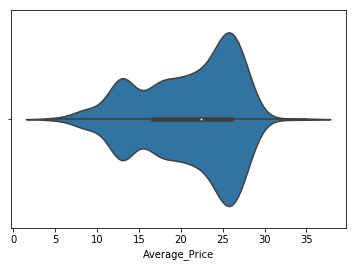

In [90]:
import seaborn as sb
#first let's look at where most of the avg prices falls
best_book_price = best_book[best_book['Average_Price']!=0]
vi = sb.violinplot(x='Average_Price',data=best_book_price)
vi

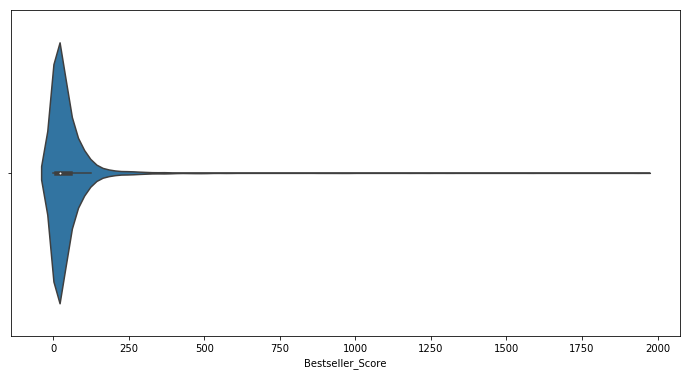

In [105]:
plt.figure(figsize=(12,6))
viB = sb.violinplot(x='Bestseller_Score',data=best_book)
viB

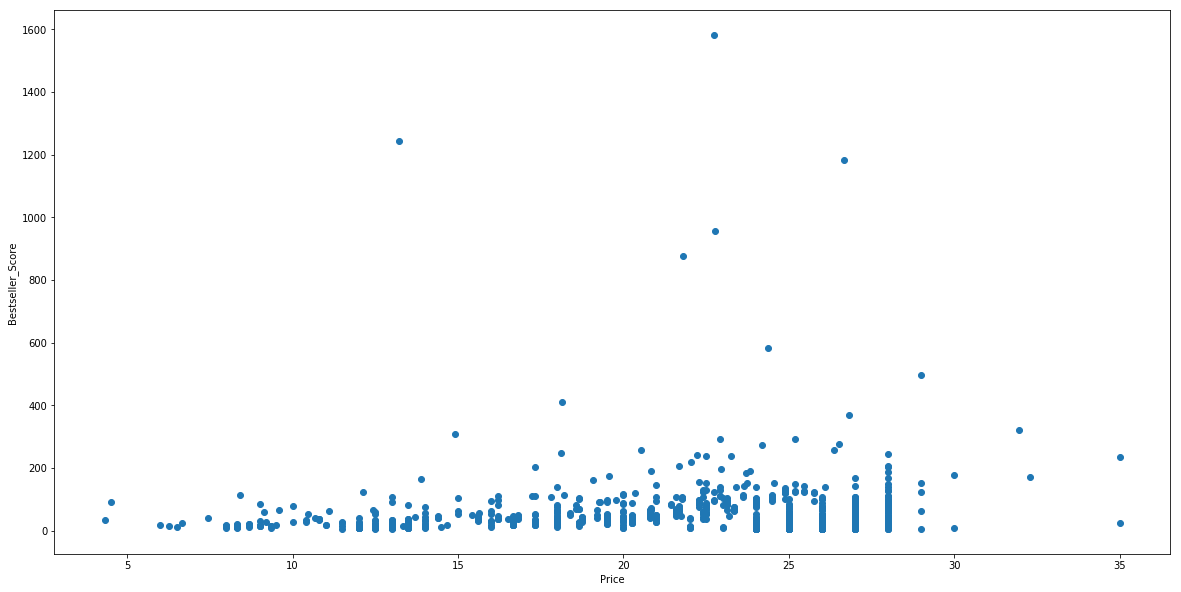

In [25]:
import matplotlib.pyplot as plt
#drop the books that don't have a price
plt.figure(figsize=(20,10))
plt.scatter(best_book_price["Average_Price"],best_book_price['Bestseller_Score'])
plt.xlabel("Price")
plt.ylabel("Bestseller_Score")
plt.show()

In [165]:
import statsmodels.formula.api as statform
import numpy as np
reg = statform.ols(formula='Bestseller_Score ~ Average_Price', data=best_book_price).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Bestseller_Score   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     12.34
Date:                Fri, 19 Jul 2019   Prob (F-statistic):           0.000463
Time:                        14:29:17   Log-Likelihood:                -6117.8
No. Observations:                1023   AIC:                         1.224e+04
Df Residuals:                    1021   BIC:                         1.225e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        14.3848     11.426      1.259      0.208      -8.037      36.806
Average_Price     1.8513      0.527      3.513      0.000       0.817       2.885
==============================================================================
Omnibus:                     1595.662   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           606335.674
Skew:                           9.407   Prob(JB):                         0.00
Kurtosis:                     120.775   Cond. No.                         82.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

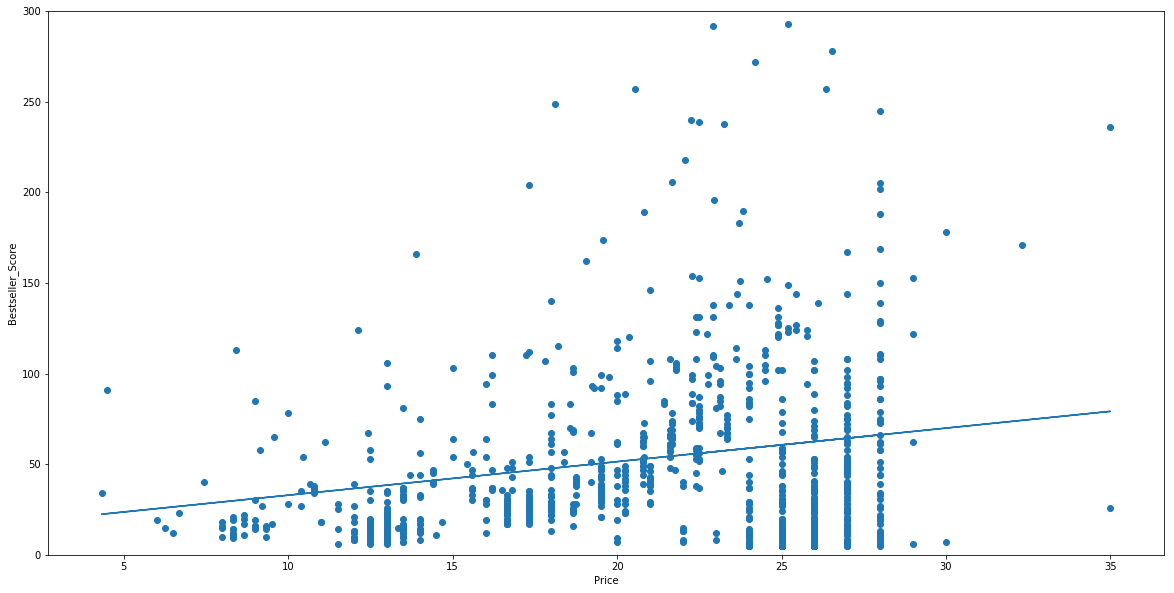

In [164]:
#get the slope and intercept of expected
#slope = reg.params['Average_Price']
#inter = reg.params['Intercept']
#expected_list = list(map(lambda x: slope*x +inter,best_book_price['Average_Price']))
#best_book_price['Expected_Score'] = reg.predict()
#resid_list = list(map(lambda x, y: x - y,expected_list,best_book_price['Average_Price']))
#best_book_price['Resid'] = resid_list
plt.figure(figsize=(20,10))
plt.plot(best_book_price["Average_Price"],reg.predict())
plt.scatter(best_book_price["Average_Price"],best_book_price['Bestseller_Score'])
plt.xlabel("Price")
plt.ylabel("Bestseller_Score")
plt.ylim((0,300))
plt.show()

# Genre

In [121]:
#add the genres into the main data set
genre_list = list()
combo_list = list()
for curr_book in author_match_df.iterrows():
    gr_id = curr_book[1]['goodread_book_id']
    #look the book up by it's id
    book_genre_row = genre_seller[genre_seller['GoodReads_ID']==gr_id]
    #save the primary genre
    book_genre = book_genre_row['Primary_Genre'].unique()[0]
    #if the book has a secodary genre then save that too
    if (("None" not in book_genre_row['Secondary_Genre'].unique()[0]) and ("Other" not in book_genre_row['Secondary_Genre'].unique()[0])):
        sec_genre = "/" + book_genre_row['Secondary_Genre'].unique()[0] 
        book_genre = book_genre + sec_genre
    #to make it a little easier use one genre for each combo (Ex: Rom/Fan = Fan/Rom)
    words = book_genre.split('/')
    rev = book_genre
    if len(words) == 3:
        print(book_genre)
    if len(words) == 2:
        rev = words[1] + '/n' + "/" + words[0]
    if (book_genre not in combo_list):
        #if the combo isn't in the combo list AND the rev isn't then add it
        if (rev not in combo_list):
            combo_list.append(book_genre)
        #if the combo isn't in the combo list BUT the rev is then flip it
        else:
            book_genre = rev
    genre_list.append(book_genre)
author_match_df['Genre'] = genre_list
#drop one book that couldn't be sorted
author_match_df = author_match_df[author_match_df['Genre']!="Fantasy/SciFi/Mystery/Romance/Realistic/Thriller/Comedy/Drama"]
print(author_match_df['Genre'].unique())

Romance/Realistic/Drama
['Mystery/Thriller' 'Realistic/SciFi' 'SciFi/Fantasy' 'Thriller/Mystery'
 'Thriller' 'Fantasy' 'Fantasy/Romance' 'Realistic' 'Mystery/Realistic'
 'Realistic/Mystery' 'Romance' 'Fantasy/Realistic' 'Romance/Realistic'
 'Realistic/Romance' 'Realistic/Thriller' 'Mystery' 'Mystery/Comedy'
 'Comedy/SciFi' 'Mystery/Romance' 'Fantasy/Comedy' 'Romance/Thriller'
 'Realistic/Drama' 'SciFi' 'Romance/Comedy' 'SciFi/Realistic'
 'Fantasy/Thriller' 'SciFi/Thriller' 'Drama/Realistic' 'Thriller/Fantasy'
 'Comedy/Fantasy' 'Fantasy/SciFi' 'Thriller/Romance' 'Romance/Fantasy'
 'Realistic/Fantasy' 'SciFi/Mystery' 'Fantasy/Mystery' 'Romance/Drama'
 'Comedy/Realistic' 'Mystery/Drama' 'Comedy' 'Mystery/Fantasy'
 'Comedy/Mystery' 'SciFi/Romance' 'Thriller/Comedy' 'Realistic/Comedy'
 'Drama' 'Thriller/SciFi' 'Romance/Realistic/Drama' 'Romance/Mystery']


In [142]:
test_short = author_match_df['Genre'].str.replace("SciFi","SF")
test_short = test_short.str.replace("Romance","RO")
test_short = test_short.str.replace("Comedy","C")
test_short = test_short.str.replace("Thriller","T")
test_short = test_short.str.replace("Mystery","M")
test_short = test_short.str.replace("Drama","D")
test_short = test_short.str.replace("Fantasy","F")
test_short = test_short.str.replace("Realistic","RE")
short_df = pd.DataFrame({'Genre':test_short,'Bestseller_Score':author_match_df['Bestseller_Score']})
#plt.figure(figsize=(22,10))
#vi_pairs = sb.violinplot(x='Genre',y='Bestseller_Score',data=short_df, cut=0)
#plt.ylim(0,300)
#vi_pairs

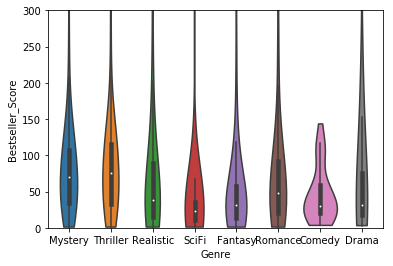

In [144]:
genre_list = list()
score_list = list()
price_list = list()
for curr_row in author_match_df.iterrows():
    curr_book = curr_row[1]
    curr_price = curr_book['Average_Price']
    curr_score = curr_book['Bestseller_Score']
    for word in curr_book['Genre'].split("/"):
        genre_list.append(word)
        score_list.append(curr_score)
        price_list.append(curr_price)
genre_graph_df = pd.DataFrame({'Bestseller_Score':score_list,'Genre':genre_list,'Price':price_list})
#since the majority of books have a BSS of less than 250, I'll zoom in on that part
#vi_graph = genre_graph_df[genre_graph_df['Bestseller_Score']<=250]
vi_graph = genre_graph_df
vi3 = sb.violinplot(x='Genre',y='Bestseller_Score',data=vi_graph, cut=0)
plt.ylim(0,300)
vi3

In [152]:
genre_graph_price_df = genre_graph_df[genre_graph_df['Price']!=0]
reg3 = statform.ols(formula='Bestseller_Score ~ Genre', data=genre_graph_df).fit()
print(len(genre_graph_price_df['Price']))
reg3.summary()

682


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Bestseller_Score   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.171
Date:                Fri, 19 Jul 2019   Prob (F-statistic):             0.0343
Time:                        14:17:57   Log-Likelihood:                -7687.3
No. Observations:                1223   AIC:                         1.539e+04
Df Residuals:                    1215   BIC:                         1.543e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             46.8000     26.063      1.796      0.073      -4.334      97.934
Genre[T.Drama]        40.0889     40.283      0.995      0.320     -38.944     119.122
Genre[T.Fantasy]      11.4418     28.112      0.407      0.684     -43.712      66.595
Genre[T.Mystery]      42.9542     27.124      1.584      0.114     -10.261      96.169
Genre[T.Realistic]    39.3416     27.426      1.434      0.152     -14.466      93.149
Genre[T.Romance]      28.6167     27.935      1.024      0.306     -26.190      83.423
Genre[T.SciFi]         1.0621     31.178      0.034      0.973     -60.107      62.232
Genre[T.Thriller]     48.0165     27.256      1.762      0.078      -5.458     101.491
==============================================================================
Omnibus:                     1530.333   Durbin-Watson:                   1.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           180880.827
Skew:                           6.624   Prob(JB):                         0.00
Kurtosis:                      61.087   Cond. No.                         22.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
genre_graph_price_df = genre_graph_df[genre_graph_df['Price']!=0]
reg3 = statform.ols(formula='Bestseller_Score ~ Genre', data=genre_graph_df).fit()
print(len(genre_graph_price_df['Price']))
reg3.summary()

682


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Bestseller_Score   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.171
Date:                Fri, 19 Jul 2019   Prob (F-statistic):             0.0343
Time:                        12:40:37   Log-Likelihood:                -7687.3
No. Observations:                1223   AIC:                         1.539e+04
Df Residuals:                    1215   BIC:                         1.543e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             46.8000     26.063      1.796      0.073      -4.334      97.934
Genre[T.Drama]        40.0889     40.283      0.995      0.320     -38.944     119.122
Genre[T.Fantasy]      11.4418     28.112      0.407      0.684     -43.712      66.595
Genre[T.Mystery]      42.9542     27.124      1.584      0.114     -10.261      96.169
Genre[T.Realistic]    39.3416     27.426      1.434      0.152     -14.466      93.149
Genre[T.Romance]      28.6167     27.935      1.024      0.306     -26.190      83.423
Genre[T.SciFi]         1.0621     31.178      0.034      0.973     -60.107      62.232
Genre[T.Thriller]     48.0165     27.256      1.762      0.078      -5.458     101.491
==============================================================================
Omnibus:                     1530.333   Durbin-Watson:                   1.192
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           180880.827
Skew:                           6.624   Prob(JB):                         0.00
Kurtosis:                      61.087   Cond. No.                         22.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

   Avg_Bestseller_Score      Genre
0             46.800000     Comedy
6             47.862069      SciFi
2             58.241830    Fantasy
5             75.416667    Romance
4             86.141631  Realistic
1             86.888889      Drama
3             89.754153    Mystery
7             94.816479   Thriller


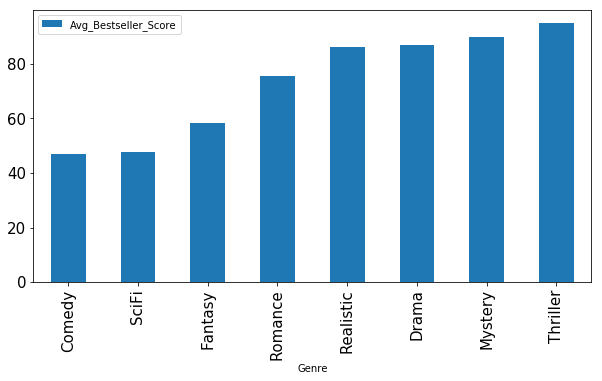

In [139]:
genre_list = list()
avg_bs_list = list()
for curr_genre in genre_graph_df.groupby("Genre"):
    avg_bs = sum(curr_genre[1]['Bestseller_Score'])/(len(curr_genre[1]['Bestseller_Score']))
    avg_bs_list.append(avg_bs)
    
    genre_list.append(curr_genre[0])
avg_genre_graph_df = pd.DataFrame({'Avg_Bestseller_Score':avg_bs_list,'Genre':genre_list})
avg_genre_graph_df = avg_genre_graph_df.sort_values('Avg_Bestseller_Score')
print(avg_genre_graph_df)
avg_hist = avg_genre_graph_df.plot.bar(x='Genre',y='Avg_Bestseller_Score',figsize=(10,5),fontsize=15)
avg_hist

   Count      Genre
1     12      Drama
0     16     Comedy
6     27      SciFi
2     81    Fantasy
5     94    Romance
4    121  Realistic
7    155   Thriller
3    176    Mystery


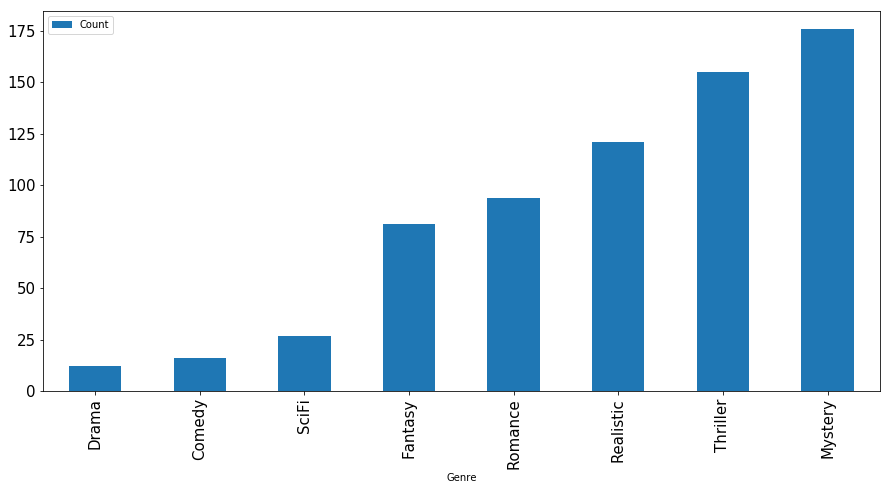

In [140]:
genre_list = list()
count_list = list()
for curr_genre in genre_graph_price_df.groupby("Genre"):
    count = len(curr_genre[1])
    count_list.append(count)
    genre_list.append(curr_genre[0])
count_graph_df = pd.DataFrame({'Count':count_list,'Genre':genre_list})
count_graph_df = count_graph_df.sort_values('Count')
print(count_graph_df)
count_hist = count_graph_df.plot.bar(x='Genre',y='Count',figsize=(15,7),fontsize=15)
count_hist

   Count      Genre
1     12      Drama
0     16     Comedy
6     27      SciFi
2     81    Fantasy
5     94    Romance
4    121  Realistic
7    155   Thriller
3    176    Mystery


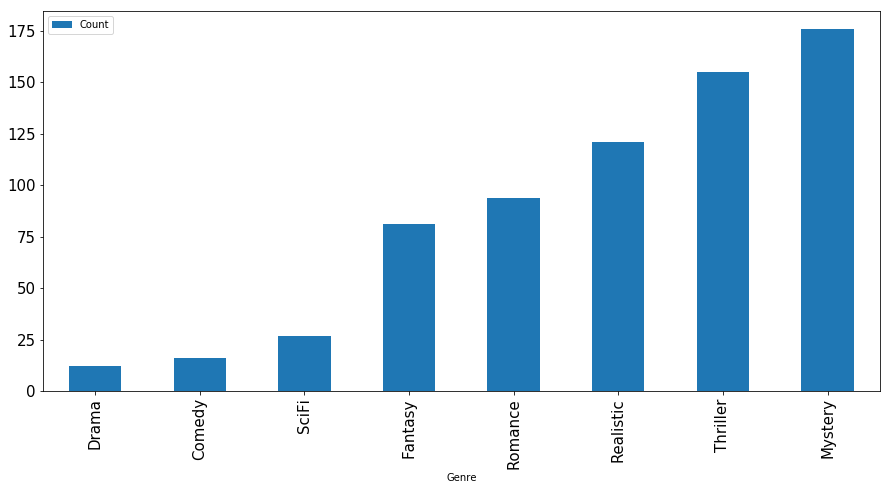

In [35]:
genre_list = list()
count_list = list()
for curr_genre in genre_graph_price_df.groupby("Genre"):
    count = len(curr_genre[1])
    count_list.append(count)
    genre_list.append(curr_genre[0])
count_graph_df = pd.DataFrame({'Count':count_list,'Genre':genre_list})
count_graph_df = count_graph_df.sort_values('Count')
print(count_graph_df)
count_hist = count_graph_df.plot.bar(x='Genre',y='Count',figsize=(15,7),fontsize=15)
count_hist

In [172]:
genre_graph_df = genre_graph_df[genre_graph_df['Price']!=0]
reg2 = statform.ols(formula='Bestseller_Score ~ Price : Genre', data=genre_graph_df).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Bestseller_Score   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.538
Date:                Fri, 19 Jul 2019   Prob (F-statistic):              0.140
Time:                        14:34:26   Log-Likelihood:                -4313.6
No. Observations:                 682   AIC:                             8645.
Df Residuals:                     673   BIC:                             8686.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 19.6219     21.478      0.914      0.361     -22.550      61.794
Price:Genre[Comedy]        2.1326      2.229      0.957      0.339      -2.244       6.510
Price:Genre[Drama]         4.6270      2.182      2.121      0.034       0.343       8.910
Price:Genre[Fantasy]       2.6211      1.218      2.153      0.032       0.231       5.012
Price:Genre[Mystery]       2.9216      1.015      2.878      0.004       0.928       4.915
Price:Genre[Realistic]     3.4746      1.141      3.046      0.002       1.235       5.714
Price:Genre[Romance]       3.2854      1.159      2.834      0.005       1.009       5.562
Price:Genre[SciFi]         2.7693      1.503      1.842      0.066      -0.183       5.721
Price:Genre[Thriller]      3.0968      1.028      3.013      0.003       1.079       5.115
==============================================================================
Omnibus:                      918.296   Durbin-Watson:                   0.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           123109.771
Skew:                           7.168   Prob(JB):                         0.00
Kurtosis:                      67.240   Cond. No.                         48.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [166]:
#to show the relationships of the various genres let's make all of their lines of best fit
plt.figure(figsize=(20,10))
x_list = genre_graph_price_df['Price']
#print(x_list)

<Figure size 1440x720 with 0 Axes>